<span style="color:red">
votre code n'est pas structuré : mettez des numéros pour qu'on comprenne où on en est

</span>

In [3]:
#import des librairies
#from sklearn import datasets
import numpy as np
import pandas as pd

In [6]:
#Importer le fichier train
df =pd.DataFrame.from_csv("./../projetTrain.csv")
#Remplacer le données manquantes par la médiane
df=df.fillna(df.median())
#y = target - la données à prédire
y = df["target"]
#Mettre dans X toutes les colonnes sauf target, Product_Info_2 (type object) et Id
X= df.drop('target', 1)
#X= X.drop('Product_Info_2',1)
#X = X.drop('Id',1)

In [7]:
# type des variables
df.dtypes 

Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
                        ...   
Medical_Keyword_20       int64
Medical_

In [8]:
#Pour les graphes Perceptron - On prend deux colonnes
#X1 = df["Wt"]
#X2 = df["BMI"]
#X2 = df["Ht"]
#X = pd.concat([X1, X2], axis=1)
Y1 = df["Insurance_History_4"]
Y2 = df["Employment_Info_2"]
Y = pd.concat([Y1, Y2], axis=1)
Y.head()

,Insurance_History_4,Employment_Info_2
Id,,
2,1,12
5,1,1
6,3,9
7,3,9
8,3,9


In [265]:
X.head()

,Wt,Ht
1,0.148536,0.581818
2,0.131799,0.600000
3,0.288703,0.745455
4,0.205021,0.672727
5,0.234310,0.654545


In [300]:
#afficher la taille de X
X.shape

(51381, 125)

In [81]:
# Import du fichier Valid
dfv =pd.DataFrame.from_csv("C:/Users/abi_t/ESILV/Python Romain Jouin/TP_Maison_Novembre_2017/valid.csv")
#Remplacer le données manquantes par la médiane
dfv=dfv.fillna(dfv.median())
#suppression de la colonne Product_Info_2
#X_valid= dfv.drop('Product_Info_2',1)

In [302]:
#dfv.head()
#dfv.shape
X_valid.head()
X_valid.shape

(8000, 125)

In [165]:
#print(y)
#print(X)

In [83]:
#Transformation de la variable multiclass Product_info_2 en integer
from sklearn.preprocessing import LabelEncoder
z = X["Product_Info_2"]
le = LabelEncoder()
z=le.fit_transform(z)
print(z)
X["Product_Info_2"] = z
#print(X["Product_Info_2"])

[16  0 18 ..., 14 18 15]


In [84]:
#Echantillonnage du fichier train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 0)

<span style="color:red">
pourquoi passer par une PCA ? 
</span>

In [85]:
#Utilisation de pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy : %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy : 0.687


In [86]:
#Validation Croisée
from sklearn.cross_validation import cross_val_score
scores = cross_val_score (estimator = pipe_lr,
                         X = X_train,
                         y = y_train,
                         cv = 10,
                         n_jobs = 1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.682 +/- 0.006


<span style="color:red">
Comment en arrive-t-on a des dizaines de milliers de points ? 
</span>

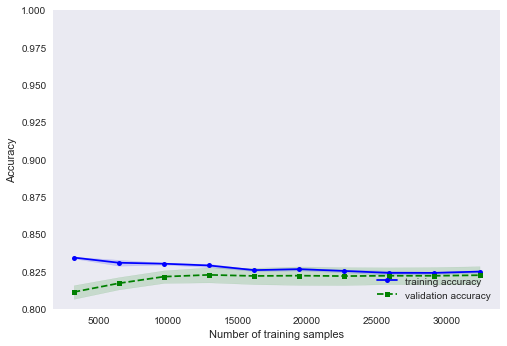

In [445]:
#biais variance avec des learning curves
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10,
                                                       n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize = 5,
        label = 'training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean,
        color='green', linestyle = '--',
        marker='s',
        markersize = 5,
        label = 'validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()


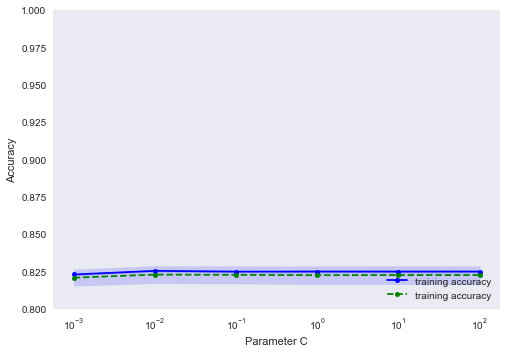

In [446]:
#En variant le paramètre C
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator = pipe_lr,
    X = X_train,
    y = y_train,
    param_name = 'clf__C',
    param_range = param_range,
    cv = 10)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize = 5,
        label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                train_mean - train_std, alpha = 0.15,
                color = 'blue')
plt.plot(param_range, test_mean,
        color='green', linestyle = '--',
        marker='o', markersize = 5,
        label = 'training accuracy')
plt.fill_between(param_range, test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15, color = 'blue')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()


In [444]:
#print(X_train)

In [46]:
print(X)

       Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
1                   1              16              10        0.076923   
2                   1               0              26        0.076923   
3                   1              18              26        0.076923   
4                   1              17              10        0.487179   
5                   1              15              26        0.230769   
6                   1               7              10        0.166194   
7                   1              15              26        0.076923   
8                   1              16              26        0.230769   
9                   1              18              21        0.076923   
10                  1              17              26        0.230769   
11                  1               1              26        0.102564   
12                  2              14              26        0.487179   
13                  1              17              

In [87]:
#Standardisation des données
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [43]:
#Regression Logistique
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty ='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
#print('Training accuracy :', lr.score(X_test_std, y_train))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr.intercept_

array([-1.89391996])

In [23]:
#coefficients de la régression
lr.coef_

array([[ -1.35965286e-01,   3.69557000e-02,  -6.10632453e-02,
          2.13101233e-01,  -5.61711113e-02,  -2.17421451e-02,
          4.41202138e-02,  -3.27911866e-01,   7.51147788e-01,
         -1.59872504e+00,  -1.82446935e-01,   1.79959945e-02,
          1.16899532e-02,  -1.88276873e-02,  -1.04331450e-02,
         -1.25531218e-02,   7.50780176e-03,  -7.55614493e-02,
         -3.72465410e-01,  -1.61568187e-02,   4.68805291e-02,
         -8.29409863e-02,   1.96951866e-01,  -1.11156458e-01,
         -2.59001826e-02,  -1.17837451e-01,   1.63564226e-01,
          1.02650733e-01,  -3.74652041e-03,   7.02391822e-02,
         -2.03545016e-02,  -7.84640221e-02,   1.14898293e-01,
          4.86184603e-02,   1.22400527e-01,   5.28639784e-02,
          9.19172525e-02,   4.03988144e-02,   4.64783870e-02,
          5.34143979e-02,   7.33696561e-01,  -1.99222045e-01,
         -3.54364926e-02,   6.51956477e-02,  -2.30849296e-02,
         -1.03776788e-02,   1.06507225e-01,   6.89702428e-02,
        

In [24]:
#Performance de la régression logistique
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.824262082387


In [47]:
print(X.columns)

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=126)


In [91]:
#problème sur lr.coef à revoir
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'ligthblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
#for c in np.arange(1, 6):
    lr = LogisticRegression(penalty = 'l1',
                           C= 10**float(c),
                           random_state = 0)
    lr.fit(X_train_std, y_train)
#    weights.append(lr.coef_[1])
    weights.append(lr.coef_)
    params.append(10**float(c))
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label = X.columns[column+1],
            color = color)
plt.axhline(0, color='black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox = True)
#plt.show()

In [49]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
feat_labels = X.columns[1:]
#print (feat_labels)
forest = RandomForestClassifier(n_estimators = 10000,
                               random_state = 0,
                               n_jobs = -1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [53]:
#importances des features
importances = forest.feature_importances_
print(importances)

[  2.68071273e-03   2.38586707e-02   5.24332682e-03   3.62715356e-02
   7.70825116e-04   4.83578455e-03   1.48313343e-03   3.85809041e-02
   2.75863946e-02   9.50598354e-02   1.40668172e-01   2.92435487e-02
   1.21147187e-02   2.82529212e-03   7.30072278e-03   3.37466262e-03
   2.41136662e-02   6.56459614e-03   1.52935208e-03   1.61805629e-02
   4.14338466e-03   1.33584024e-03   1.40872125e-02   2.15231598e-03
   3.72750672e-03   2.04291251e-03   3.01820151e-03   5.42313966e-03
   1.87176810e-02   4.22872450e-03   6.17983482e-03   3.47458561e-03
   7.39147644e-03   2.38790802e-02   1.99968987e-02   2.90698601e-02
   1.44159777e-02   2.57700238e-02   2.44464708e-02   3.34697999e-03
   3.98342524e-02   1.55876791e-03   2.05365598e-03   1.30678362e-03
   2.91044977e-03   4.78997310e-03   6.24015471e-04   6.25681554e-04
   1.96894364e-03   3.77195181e-03   1.20942195e-03   4.07900241e-02
   4.09196743e-03   1.66365758e-03   2.42182826e-03   1.56795818e-03
   1.62518561e-03   2.72211372e-03

In [55]:
indices = np.argsort(importances) [::-1]
print(indices)

[ 10   9  51  59  40   7  92   3  11  35   8  37  38  16  33   1  34  28
  19  36  22  12  80  32  14  17  30  75  77  27   2  60   5  45  65  72
  66 100  29  69  61  20  52  70  49  62  24  31  15  39 102  26  44  13
  57   0 114  64  54  73  88  23  42  25 125 117  48 119  53  56  55  41
  18   6  76  21  43  78  87  99  50 109 107 110 111 124  83 122  98  58
 116   4 105 118  81 103  67 101  84 106  94  93  85  89  47  46  97 115
  68  82  95 112 108 113  96  91  86  79 104 120 121  63  90 123  74  71]


In [70]:
feat_labels = X_train.columns[0:]
feat_labels

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=126)

In [67]:
X_train.shape[1]
feat_labels
X_train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
11960,1,16,26,0.384615,2,3,1,0.388060,0.600000,0.257322,...,0,0,0,0,0,0,0,0,0,0
48787,1,14,26,0.102564,2,3,1,0.611940,0.636364,0.330544,...,0,0,0,0,0,0,0,0,0,0
25732,1,17,10,1.000000,2,3,1,0.253731,0.672727,0.200837,...,0,0,0,0,0,0,0,0,0,0
28424,1,6,10,0.076923,2,3,1,0.462687,0.563636,0.261506,...,0,0,0,0,0,0,0,0,0,0
21325,1,16,26,0.292308,2,3,1,0.537313,0.745455,0.414226,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Afficher l'importance des features
for f in range (X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]],
                           importances[indices[f]]))

 1) BMI                            0.140668
 2) Wt                             0.095060
 3) Medical_History_15             0.040790
 4) Medical_History_23             0.040192
 5) Medical_History_4              0.039834
 6) Ins_Age                        0.038581
 7) Medical_Keyword_15             0.036570
 8) Product_Info_4                 0.036272
 9) Employment_Info_1              0.029244
10) Family_Hist_4                  0.029070
11) Ht                             0.027586
12) Medical_History_1              0.025770
13) Medical_History_2              0.024446
14) Employment_Info_6              0.024114
15) Family_Hist_2                  0.023879
16) Product_Info_2                 0.023859
17) Family_Hist_3                  0.019997
18) Insurance_History_5            0.018718
19) InsuredInfo_3                  0.016181
20) Family_Hist_5                  0.014416
21) InsuredInfo_6                  0.014087
22) Employment_Info_2              0.012115
23) Medical_Keyword_3           

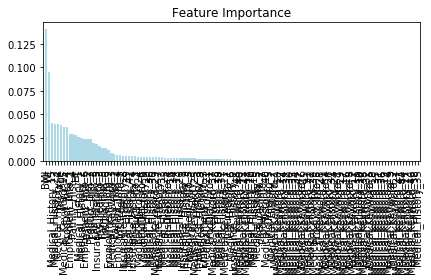

In [72]:
#Visualisation des features importances
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
        color = 'lightblue',
        align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<span style="color:red">
Comment interorétez vous ?
</span>

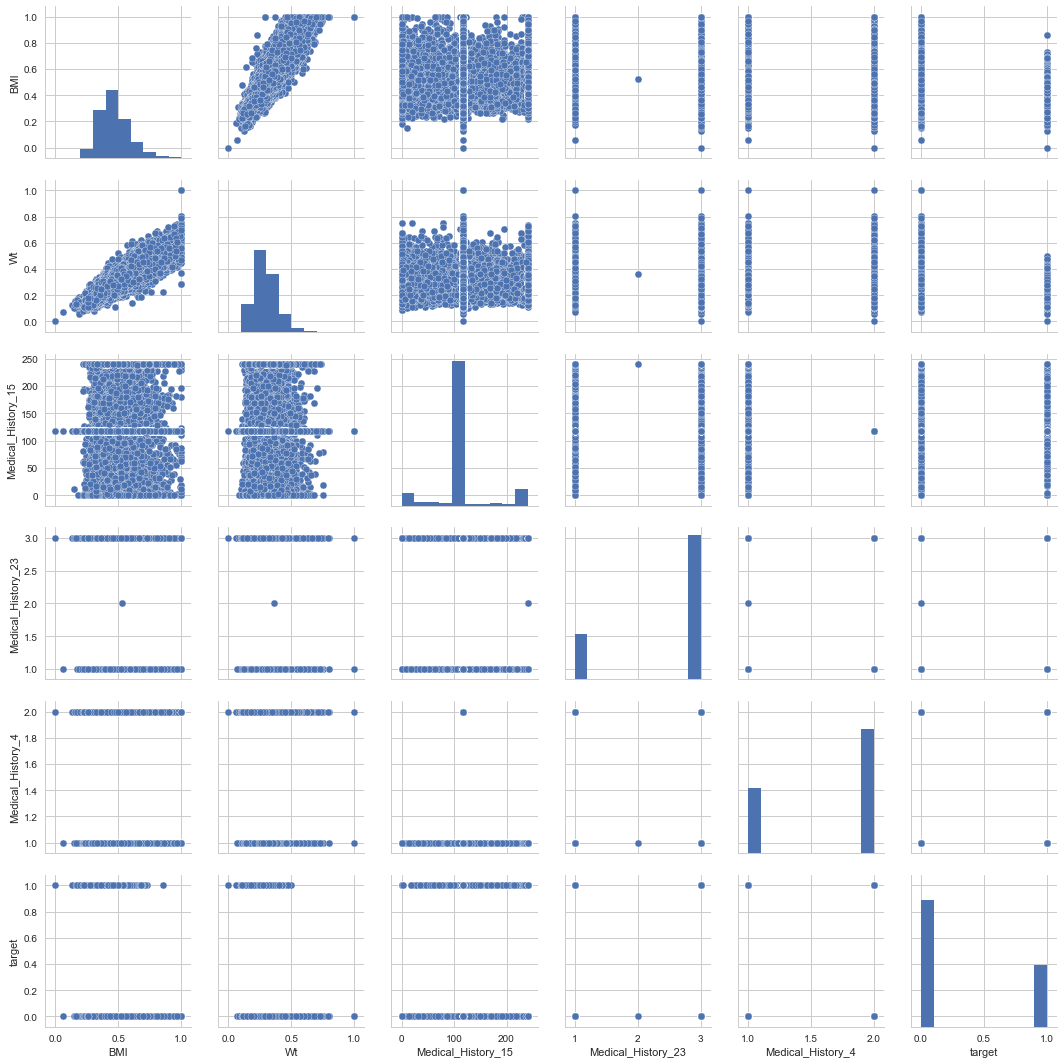

In [75]:
#Visualisation des charactéristiques des 5 features les plus importantes
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context ='notebook')
cols = ['BMI','Wt', 'Medical_History_15', 'Medical_History_23', 'Medical_History_4','target']
sns.pairplot(df[cols], size = 2.5)
plt.show()

<span style="color:red">
Comment interprétez vous ? 
</span>

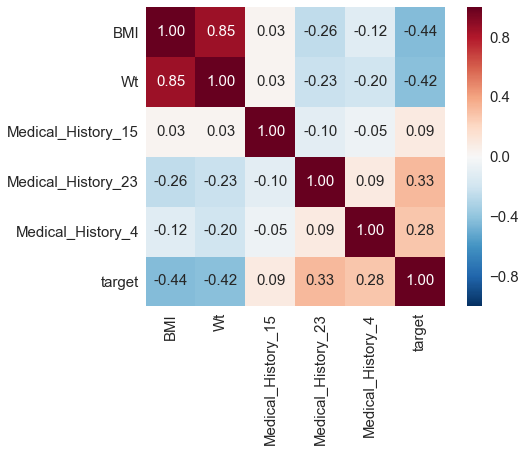

In [76]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt ='.2f',
                annot_kws = {'size': 15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [306]:
X_train.shape

(35966, 125)

In [307]:
X_test.shape

(15415, 125)

In [43]:
#X_valid_std = sc.transform(X_valid)

In [92]:
from sklearn.linear_model import Perceptron
ppn =  Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [93]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3896


In [94]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [95]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#import perceptron2

In [96]:
#Matrice de confusion
#Par définition la matrice de confusion C est telle que C_{i,j}
#est le nombre d'observations appartenant à une classe i (ici i = 0 ou 1) mais
#dont la classe prédite est j (0 ou 1)

print(confusion_matrix(y_test, y_pred))

[[8666 1781]
 [2115 2853]]


In [97]:
#Courbe ROC
classifier = Perceptron()
classifier.fit(X_train, y_train)

scores = classifier.decision_function(X_test)
fpr_per, tpr_per, _ = roc_curve(y_test, scores)

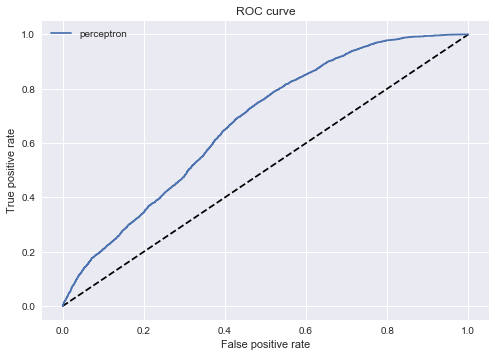

In [355]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_per, tpr_per, label='perceptron')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [311]:
y_pred_valid = ppn.predict(X_valid)
#print(y_pred_valid)

In [229]:
print(y_pred_valid)

[1 1 1 ..., 1 1 1]


In [312]:
ppn.score(X, y, sample_weight=None)

0.32887643292267571

In [313]:
ppn.score(X_test, y_test, sample_weight=None)

0.3228673370094064

In [272]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    marker = ('s', 'x', 'o', '^', 'v')
    colors =('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y =X[y == cl, 1],
                   alpha= 0.8, c=cmap(idx),
                    marker=marker[idx], label=cl)
    
    #highlight test sample
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')

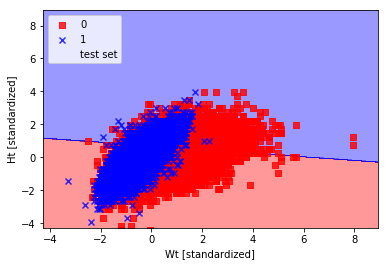

In [274]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(35966,51381))
plt.xlabel('Wt [standardized]')
plt.ylabel('Ht [standardized]')
plt.legend(loc='upper left')
plt.show()

In [114]:
print(y1_pred)

[0 1 0 ..., 1 1 1]


In [314]:
####### Régression Logistique avec GLM  ####### 

In [280]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

C:\Users\abi_t\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [277]:
categorical = ["Product_Info_1","Product_Info_2","Product_Info_3","Product_Info_4","Product_Info_5","Product_Info_6","Product_Info_7","Ins_Age","Ht","Wt","BMI","Employment_Info_1","Employment_Info_2","Employment_Info_3","Employment_Info_4","Employment_Info_5","Employment_Info_6","InsuredInfo_1","InsuredInfo_2","InsuredInfo_3","InsuredInfo_4","InsuredInfo_5","InsuredInfo_6","InsuredInfo_7","Insurance_History_1","Insurance_History_2","Insurance_History_3","Insurance_History_4","Insurance_History_5","Insurance_History_7","Insurance_History_8","Insurance_History_9","Family_Hist_1","Family_Hist_2","Family_Hist_3","Family_Hist_4","Family_Hist_5","Medical_History_1","Medical_History_2","Medical_History_3","Medical_History_4","Medical_History_5","Medical_History_6","Medical_History_7","Medical_History_8","Medical_History_9","Medical_History_10","Medical_History_11","Medical_History_12","Medical_History_13","Medical_History_14","Medical_History_15","Medical_History_16","Medical_History_17","Medical_History_18","Medical_History_19","Medical_History_20","Medical_History_21","Medical_History_22","Medical_History_23","Medical_History_24","Medical_History_25","Medical_History_26","Medical_History_27","Medical_History_28","Medical_History_29","Medical_History_30","Medical_History_31","Medical_History_32","Medical_History_33","Medical_History_34","Medical_History_35","Medical_History_36","Medical_History_37","Medical_History_38","Medical_History_39","Medical_History_40","Medical_History_41","Medical_Keyword_1","Medical_Keyword_2","Medical_Keyword_3","Medical_Keyword_4","Medical_Keyword_5","Medical_Keyword_6","Medical_Keyword_7","Medical_Keyword_8","Medical_Keyword_9","Medical_Keyword_10","Medical_Keyword_11","Medical_Keyword_12","Medical_Keyword_13","Medical_Keyword_14","Medical_Keyword_15","Medical_Keyword_16","Medical_Keyword_17","Medical_Keyword_18","Medical_Keyword_19","Medical_Keyword_20","Medical_Keyword_21","Medical_Keyword_22","Medical_Keyword_23","Medical_Keyword_24","Medical_Keyword_25","Medical_Keyword_26","Medical_Keyword_27","Medical_Keyword_28","Medical_Keyword_29","Medical_Keyword_30","Medical_Keyword_31","Medical_Keyword_32","Medical_Keyword_33","Medical_Keyword_34","Medical_Keyword_35","Medical_Keyword_36","Medical_Keyword_37","Medical_Keyword_38","Medical_Keyword_39","Medical_Keyword_40","Medical_Keyword_41","Medical_Keyword_42","Medical_Keyword_43","Medical_Keyword_44","Medical_Keyword_45","Medical_Keyword_46","Medical_Keyword_47","Medical_Keyword_48"]

In [278]:
from sklearn.feature_extraction import DictVectorizer

In [279]:
def one_hot_dataframe(data, cols, replace=False):
    vec = DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData, vec)
    

In [281]:
dftrain = df[1:49000]
dftest = df[49000:59382]
train_ohd,_,_= one_hot_dataframe(dftrain,categorical,replace=True)
test_ohd,_,_=one_hot_dataframe(dftest,categorical,replace=True)
valid_ohd,_,_=one_hot_dataframe(dfv,categorical,replace=True)
features=train_ohd.columns.tolist()

In [282]:
features.remove("Id")
features.remove("target")
train_features=train_ohd[features]
test_features=test_ohd[features]

In [285]:
valid_features=valid_ohd[features]
#print(valid_features)
y_train = dftrain["target"].values
y_test = dftest["target"].values

In [286]:
# Apprentissage du modèle GLM
glm_binom = sm.GLM(y_train, train_features, family=sm.families.Binomial())
# Prédictions sur les données d'apprentissage
glm_y_pred = glm_binom.predict(test_features,y_test)

In [287]:
#affichage des valeurs prédites
print(glm_y_pred)

[ 1.          1.          1.          1.          0.9836349   1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.75582452  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          0.5         1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  0.99999996  0.99999969  1.          0.99908895  0.88079708  0.98201379
  0.99999989  0.99330715  0.99752738  0.95257413  0.98201379  0.98201379
  0.95257413  0.99752738  0.99999917  1.          0.73105858  1.          0.9999833


In [288]:
#Fit and summary
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48855
Model Family:                Binomial   Df Model:                          143
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -17962.
Date:                Sun, 31 Dec 2017   Deviance:                       35924.
Time:                        19:30:01   Pearson chi2:                 5.28e+04
No. Iterations:                     9                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
BMI                    -2.9968      1.280     -2.342      0.019      -5.505      -0.489
Employment_Info_1       0

In [289]:
print("Training the model")
predictions = res.predict(test_features)

Training the model


In [290]:
print(predictions)

49001    0.919397
49002    0.278646
49003    0.001053
49004    0.054339
49005    0.000567
49006    0.905087
49007    0.430893
49008    0.004581
49009    0.950734
49010    0.146998
49011    0.465587
49012    0.252747
49013    0.077336
49014    0.683898
49015    0.646303
49016    0.850483
49017    0.352755
49018    0.724664
49019    0.000543
49020    0.934535
49021    0.816147
49022    0.907197
49023    0.546636
49024    0.689727
49025    0.011286
49026    0.706318
49027    0.055123
49028    0.807010
49029    0.038459
49030    0.188955
           ...   
51352    0.944334
51353    0.349600
51354    0.037171
51355    0.009698
51356    0.040094
51357    0.024433
51358    0.110002
51359    0.055502
51360    0.114770
51361    0.148148
51362    0.181214
51363    0.141615
51364    0.220380
51365    0.566065
51366    0.498532
51367    0.392456
51368    0.238402
51369    0.320383
51370    0.283509
51371    0.203519
51372    0.656124
51373    0.000023
51374    0.160457
51375    0.006281
51376    0

In [316]:
#print(scores)

In [295]:
predictions_valid = res.predict(valid_features)
print(predictions_valid)

Id
70893    4.788497e-01
20997    4.700350e-01
29427    5.715469e-01
45161    6.314648e-01
71802    1.085208e-03
15895    1.239593e-01
71014    5.576689e-08
74730    6.975371e-01
52094    2.318787e-02
49602    7.097723e-02
4887     9.307129e-01
16256    1.053466e-01
13928    3.058208e-05
54195    6.467587e-01
30401    2.121551e-01
60799    1.639992e-03
39297    3.044029e-01
56628    7.992593e-01
78505    3.847582e-01
30054    5.705274e-01
61392    7.806434e-01
73899    3.365129e-01
16732    4.696339e-01
51360    1.149334e-02
9934     6.293260e-01
21124    7.503132e-02
30561    5.824771e-01
1072     8.582261e-01
30259    1.536886e-02
68725    1.271854e-01
             ...     
54253    1.648209e-01
77841    3.757906e-02
21403    3.810746e-01
21233    5.339301e-01
41068    6.159740e-02
16822    3.276410e-01
37398    9.549423e-01
19893    8.599580e-01
31002    3.193886e-03
31487    2.030330e-01
46428    8.373369e-01
54318    6.162885e-01
5151     1.128349e-01
30769    8.107555e-01
47931  

In [296]:
#génération du fichier des prédictions
import csv
prediction_file = open("pythonGLM.csv", "w")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(predictions_valid)

124449

In [297]:
prediction_file.close()

In [319]:
#Quantities of interest
#print('Total number of trials:',  y_train[0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Parameters:  BMI                    -2.996779
Employment_Info_1       0.200131
Employment_Info_2       0.001719
Employment_Info_3      -0.047657
Employment_Info_4      -0.484419
Employment_Info_5       0.067394
Employment_Info_6       0.049745
Family_Hist_1           0.227625
Family_Hist_2           0.458548
Family_Hist_3           1.309555
Family_Hist_4           0.534435
Family_Hist_5           1.433725
Ht                      8.748244
Ins_Age                -1.115211
Insurance_History_1    -0.230344
Insurance_History_2    -0.372536
Insurance_History_3     0.091880
Insurance_History_4     0.096984
Insurance_History_5    -1.424842
Insurance_History_7    -0.008946
Insurance_History_8     0.069172
Insurance_History_9     0.023696
InsuredInfo_1          -0.225550
InsuredInfo_2          -3.702298
InsuredInfo_3          -0.006982
InsuredInfo_4           0.138248
InsuredInfo_5          -0.446894
InsuredInfo_6           0.401346
InsuredInfo_7          -0.353028
Medical_History_1       0.0030

In [320]:
res.conf_int()

,0,1
BMI,-5.504997,-0.488560
Employment_Info_1,-0.164585,0.564847
Employment_Info_2,-0.007477,0.010915
Employment_Info_3,-0.108263,0.012948
Employment_Info_4,-1.398757,0.429919
Employment_Info_5,-0.053128,0.187916
Employment_Info_6,-0.049824,0.149314
Family_Hist_1,0.168455,0.286794
Family_Hist_2,0.172619,0.744477
Family_Hist_3,0.994175,1.624934


In [321]:
# odds ratios
np.exp(res.params)

BMI                    4.994771e-02
Employment_Info_1      1.221563e+00
Employment_Info_2      1.001720e+00
Employment_Info_3      9.534605e-01
Employment_Info_4      6.160550e-01
Employment_Info_5      1.069717e+00
Employment_Info_6      1.051003e+00
Family_Hist_1          1.255614e+00
Family_Hist_2          1.581776e+00
Family_Hist_3          3.704524e+00
Family_Hist_4          1.706485e+00
Family_Hist_5          4.194295e+00
Ht                     6.299614e+03
Ins_Age                3.278460e-01
Insurance_History_1    7.942602e-01
Insurance_History_2    6.889849e-01
Insurance_History_3    1.096233e+00
Insurance_History_4    1.101843e+00
Insurance_History_5    2.405464e-01
Insurance_History_7    9.910940e-01
Insurance_History_8    1.071620e+00
Insurance_History_9    1.023978e+00
InsuredInfo_1          7.980773e-01
InsuredInfo_2          2.466678e-02
InsuredInfo_3          9.930427e-01
InsuredInfo_4          1.148261e+00
InsuredInfo_5          6.396116e-01
InsuredInfo_6          1.493

In [322]:
# odds ratios and 95% CI
params = res.params
conf = res.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                             2.5%         97.5%            OR
BMI                  4.066401e-03      0.613509  4.994771e-02
Employment_Info_1    8.482458e-01      1.759179  1.221563e+00
Employment_Info_2    9.925512e-01      1.010974  1.001720e+00
Employment_Info_3    8.973919e-01      1.013032  9.534605e-01
Employment_Info_4    2.469036e-01      1.537134  6.160550e-01
Employment_Info_5    9.482588e-01      1.206732  1.069717e+00
Employment_Info_6    9.513967e-01      1.161038  1.051003e+00
Family_Hist_1        1.183475e+00      1.332150  1.255614e+00
Family_Hist_2        1.188414e+00      2.105339  1.581776e+00
Family_Hist_3        2.702494e+00      5.078086  3.704524e+00
Family_Hist_4        1.287368e+00      2.262049  1.706485e+00
Family_Hist_5        2.769700e+00      6.351630  4.194295e+00
Ht                   4.641642e+02  85498.053094  6.299614e+03
Ins_Age              2.559781e-01      0.419891  3.278460e-01
Insurance_History_1  6.156518e-01      1.024685  7.942602e-01
Insuranc

In [323]:
nobs = res.nobs
#y = y_train / y_train.sum()
#y = y_train[:,0]/y_train.sum(1)
yhat = res.mu
print (yhat)

[ 0.25561596  0.61060398  0.90012136 ...,  0.9761326   0.69093716
  0.00293817]


In [324]:
from statsmodels.graphics.api import abline_plot

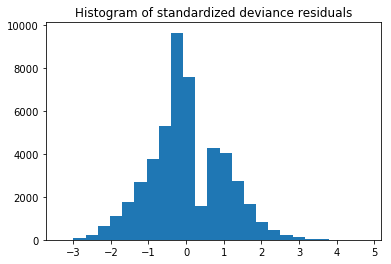

In [325]:
#Histogram of standardized deviance residuals
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

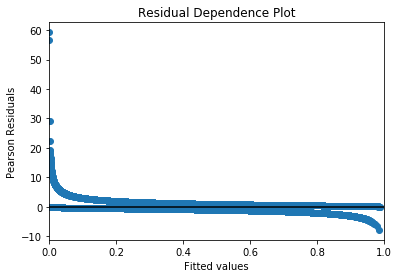

In [326]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

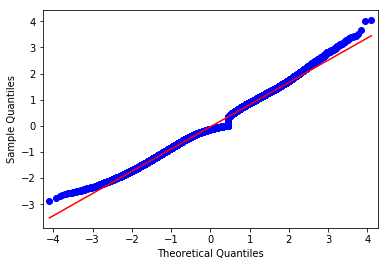

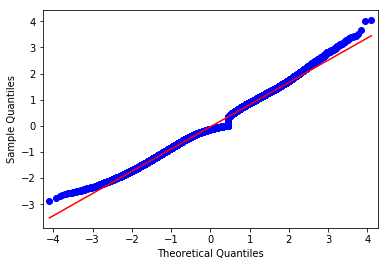

In [327]:
#QQ Plot of Deviance Residuals
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

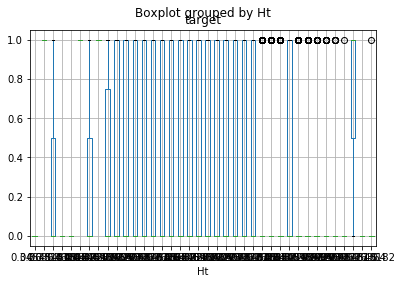

In [328]:
# parallèle boxplots
df.boxplot(column="target",by="Ht") 

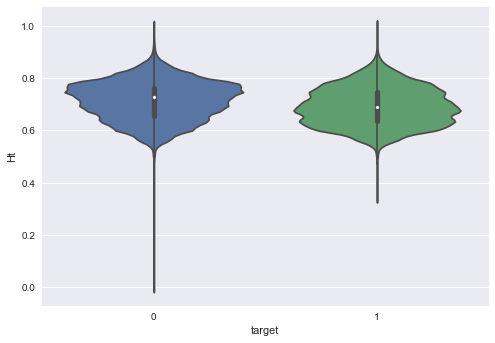

In [329]:
import seaborn as sns 
sns.violinplot(df['target'], df['Ht']) #Variable Plot
sns.despine()

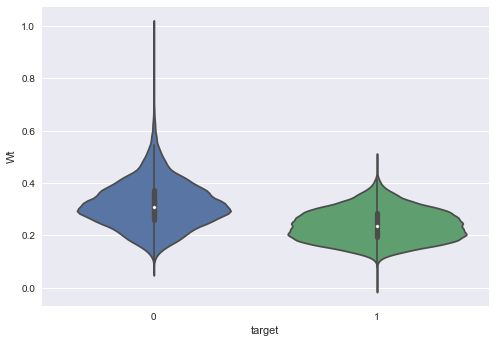

In [330]:
sns.violinplot(df['target'], df['Wt']) #Variable Plot
sns.despine()

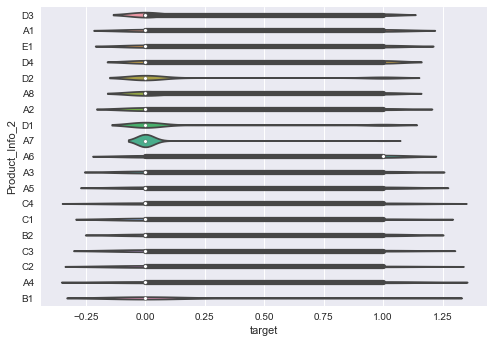

In [331]:
sns.violinplot(df['target'], df['Product_Info_2']) #Variable Plot
sns.despine()

In [353]:
#Courbe ROC pour la régression Logistique
classifier = LogisticRegression(C=0.1)
classifier.fit(X_train, y_train)
scores = classifier.decision_function(X_test)
 
fpr_lr, tpr_lr, _ = roc_curve(y_test, scores)
 
classifier = LogisticRegression(C=1000)
classifier.fit(X_train, y_train)
scores = classifier.decision_function(X_test)
 
fpr_lr2, tpr_lr2, _ = roc_curve(y_test, scores)


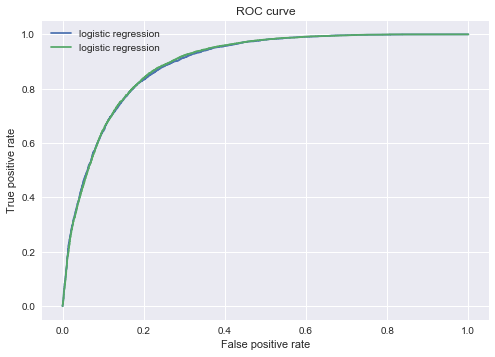

In [354]:
plt.plot(fpr_lr, tpr_lr, label='logistic regression')
plt.plot(fpr_lr2, tpr_lr2, label='logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
####### Classification avec xgboost  ####### 

In [401]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 3, random_state = 0)
tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [397]:
y_pred = tree.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4968


In [398]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.68


In [400]:
#Matrice de confusion
print(confusion_matrix(y_test, y_pred))

[[10447     0]
 [ 4968     0]]


In [421]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy',
                               n_estimators = 20,
                               random_state = 1,
                               n_jobs = 2,
                                max_depth=3
                               )
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [422]:
y_pred = forest.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4968


In [423]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.68


In [429]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, p = 2,
                          metric ='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [430]:
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4151


In [426]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.75
